<a href="https://colab.research.google.com/github/carvalhopinheiro/Ciencia-de-Dados/blob/main/An%C3%A1lise_de_Dados_Empresa_de_Supermercado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://github.com/PAlab0/PAlab0/blob/main/logo.png?raw=true">


*by [Paulo Victor](https://www.linkedin.com/in/carvalhopinheiro/)*

---


#Analisando Dados da Empresa de Supermercado com Python
Na Era da informação a quantidade de dados que as empresas produzem cresce cada vez mais, mas nem todas as empresas utilizam seus dados da melhor forma possível, e as empresas que dominam seus dados e baseiam suas decisões neles, usando técnicas de análises, previsibilidade, classificação e automação tendem a ter uma vantagem competitiva avassaladora em relação às empresas que não usam Python.
 
Para demonstrar como essa tecnologia nos dias atuais é de vital importância e como podem melhorar sua tomada de decisão baseada em dados, irei realizar uma análise exploratória de uma rede de supermercados.
 
Nesse projeto, vamos analisar dados de uma empresa de supermercado utilizando Python e algumas das bibliotecas mais utilizadas quando se fala em Análise de Dados com Python.


<center><img width="100%" src="https://github.com/carvalhopinheiro/Coisas-Salvas/blob/main/3871744.jpg?raw=true"></center>



#  Importando as bibliotecas necessárias 



In [259]:
# importando os pacotes necessários.
import pandas as pd 
import matplotlib.pyplot as plt

Aqui importamos as bibliotecas mais usadas para a análise de dados:
* Pandas - Manipulação dos dados
* Matplot - Visualização Gráfica 

Essas duas bibliotecas são extremamentes úteis para a análise de dados com python.


In [260]:
# importando planilha do Kaggle.
df = pd.read_csv('https://github.com/carvalhopinheiro/Coisas-Salvas/raw/main/supermacket.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


O dataset utilizado foi retirado do site [Kaggle](https://www.kaggle.com/aungpyaeap/supermarket-sales) com o intuito de mostrar uma das diversas funcionalidades de python para a análise de dados.
Com isso, para melhor entendimento vamos mudar os nomes das variáveis para português e colocar o seu significado abaixo.
 
Vale ressaltar que o dataset possui 1000 entradas (linhas) e 17 variáveis, das quais as informações estão divididas entre os supermercados A, B e C.


In [261]:
# Mudando os nomes das variaveis para Português.
df.columns = ['ID', 'supermercado', 'cidade', 'tipo_cliente', 'genero', 'linha_produto', 'preco_unid', 'quantidade', 'tax', 'preco_total', 'data', 'hora', 'pagamento', 'cpv', 'margem_bruta', 'renda_bruta', 'avaliacao']

# Informação de variáveis

* **ID:** Número de identificação da fatura do recibo de venda gerado por computador
* **supermercado:** Filial do supercentro (estão disponíveis 3 filiais identificadas por A, B e C).
* **cidade:** Localização dos supercentros
* **tipo_cliente:** Tipo de cliente, registado pelos Membros para clientes com cartão de sócio e Normal para sem cartão de sócio.
* **genero:** Tipo de gênero do cliente
* **linha_produto:** Grupos de categorização geral de itens - Acessórios eletrônicos, Acessórios de moda, Alimentos e bebidas, Saúde e beleza, Casa e estilo de vida, Esportes e viagens
* **preco_unid:** Preço de cada produto em $
* **quantidade:** Número de produtos adquiridos por
* **tax:** taxa de imposto de 5% para compra do cliente
* **preco_total:** preço total incluindo imposto
* **data:** Data da compra (Registro disponível de janeiro de 2019 a março de 2019)
* **hora:** Horário da compra (10h às 21h
* **pagamento:** Pagamento usado pelo cliente para a compra (3 métodos disponíveis - Dinheiro, Cartão de crédito e Ewallet)
* **CPV:** Custo dos produtos vendido
* **margem_bruta:** Porcentagem da margem
bruta 
* **renda_bruta:** Renda bruta
* **avaliacao:** Classificação de estratificação do cliente em sua experiência geral de compra (em uma escala de 1 a 10)

In [262]:
#apagando variáveis não usadas.
df = df.drop(columns=['cidade', 'margem_bruta','renda_bruta','cpv'])

Para diminuir a quantidade de dados, vamos excluir algumas das variáveis que não serão usadas na análise visto que essa é uma análise simples, porém poderosa com o intuito de mostrar a praticidade do python e suas bibliotecas.

#Análise geral

In [263]:
# analisando o dataset e suas variáveis.
df.dtypes

ID                object
supermercado      object
tipo_cliente      object
genero            object
linha_produto     object
preco_unid       float64
quantidade         int64
tax              float64
preco_total      float64
data              object
hora              object
pagamento         object
avaliacao        float64
dtype: object

Vemos que as variáveis `data` e `hora` estão como object (palavras), vamos transformar o seu tipo para datetime.


##Transformação de variaveis 

In [264]:
# mudando o tipo da variável data e hora.
df.data = pd.to_datetime(df.data, format='%m/%d/%Y')

In [265]:
df.hora = pd.to_datetime(df.hora, format='%H:%M')

In [266]:
df.dtypes

ID                       object
supermercado             object
tipo_cliente             object
genero                   object
linha_produto            object
preco_unid              float64
quantidade                int64
tax                     float64
preco_total             float64
data             datetime64[ns]
hora             datetime64[ns]
pagamento                object
avaliacao               float64
dtype: object

Após a transformação vemos que ambas já estão em formato datetime.

In [267]:
# Analisando as variáveis numéricas.
df.describe()

,preco_unid,quantidade,tax,preco_total,avaliacao
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,6.97270
std,26.494628,2.923431,11.708825,245.885335,1.71858
min,10.080000,1.000000,0.508500,10.678500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,5.50000
50%,55.230000,5.000000,12.088000,253.848000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,10.00000



Podemos observar que nenhuma variável apresenta dados destoantes que possam atrapalhar nossa análise, porém, por via das dúvidas vamos analisar a variável  `preco_total` já que 75% dos seus dados possuem valor em ``R$463`` enquanto seu valor máximo é `R$944`.

Para isso vamos plotar gráficos boxplots e caso haja alguns valores acima do normal iremos excluir para não atrapalhar a análise.

##Tratamento dos dados

###Tratando outliers

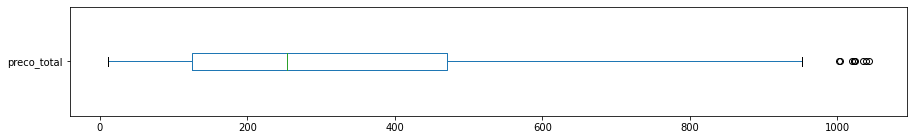

In [268]:
#gerando grafico boxplot 
df.preco_total.plot(kind='box', vert=False, figsize=(15,2))
plt.show()

In [269]:
# quantidade de valores maiores que 950
print('{} entradas'.format(len(df[df.preco_total > 950])))
print('{:.2f}%'.format((len(df[df.preco_total > 950])/df.shape[0])*100))

11 entradas
1.10%


Vemos que alguns valores estão acima de uma classificação considerada normal, logo, por via das dúvidas iremos excluir suas respectivas linhas e plotar novamente o gráfico boxplot e observar suas mudanças.

Vale ressaltar que iremos excluir somente 11 entradas o que corresponde a 1,1% do nosso dataset, ou seja, não ira afetar de forma negativa a exclusão na análise.

In [270]:
# exclusão dos valores 
df.drop(df[df.preco_total > 950].index, axis=0, inplace=True)

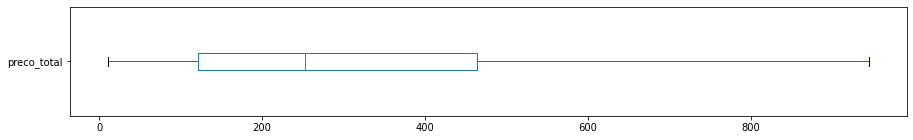

In [271]:
#gerando grafico boxplot
df.preco_total.plot(kind='box', vert=False, figsize=(15,2))
plt.show()

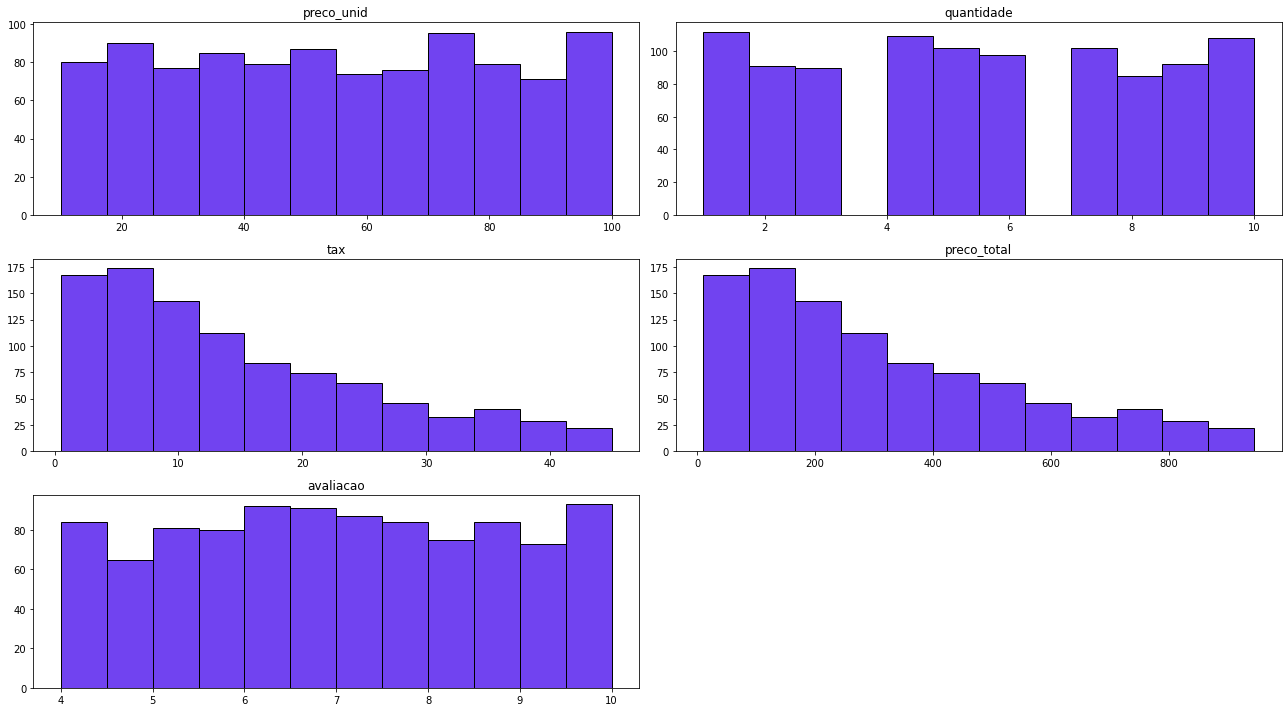

In [272]:
# histograma das variaveis.
p ='#7143F0'
cor1 = ['#e8e4f3','#e8e4f3','#e8e4f3','#e8e4f3','#e8e4f3', p]
cor = [p, '#e8e4f3','#e8e4f3','#e8e4f3','#e8e4f3','#e8e4f3']
df.hist(bins=12, figsize=(18,10), grid=False, ec = 'k', color = p)
plt.tight_layout()

Feita sua exclusão e gerando novamente o gráfico boxplot, junto ao histograma podemos analisar de forma visual os dados e perceber que nenhuma variável apresenta dados destoantes do normal.
 
Logo vamos partir para a observar de valores nulos do nosso dataset e caso exista iremos substituir por valores como a média ou mediana.


### Tratando valores nulos 

In [273]:
# valores vazios
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False) * 100

avaliacao        0.0
pagamento        0.0
hora             0.0
data             0.0
preco_total      0.0
tax              0.0
quantidade       0.0
preco_unid       0.0
linha_produto    0.0
genero           0.0
tipo_cliente     0.0
supermercado     0.0
ID               0.0
dtype: float64

Vemos que nenhuma variável possui valores nulos, logo vamos partir para a análise exploratória e ver quais informações podem melhorar a tomada de decisão.

#Análise Exploratoria

## Total, Média e Desvio padrão de vendas

In [274]:
# quantidade total media e desvio padrao
print(df.preco_total.sum())
print(df.preco_total.mean())
print(df.preco_total.std())

311853.234
315.32177350859473
236.22827303726535


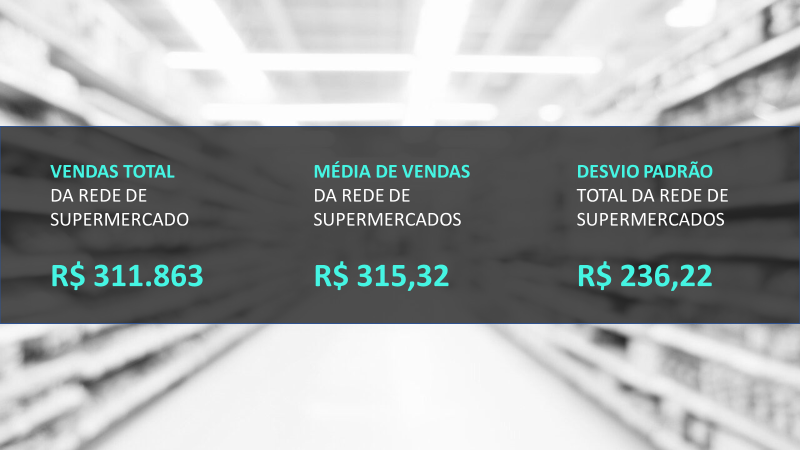

##Qual genero mais compra?

In [275]:
#genero que mais compra
print(df['genero'].value_counts() / df.shape[0] * 100)
df.groupby('genero').preco_total.mean().sort_values(ascending=False)[:]

Male      50.050556
Female    49.949444
Name: genero, dtype: float64


genero
Female    325.478320
Male      305.185745
Name: preco_total, dtype: float64

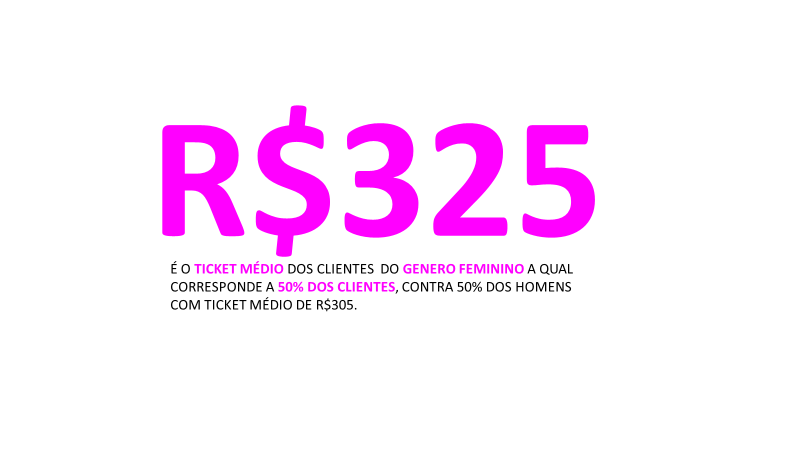


##Qual tipo de cliente mais compra?

In [276]:
#tipo de cliente
print(df['tipo_cliente'].value_counts() / df.shape[0] * 100)
df.groupby('tipo_cliente').preco_total.mean().sort_values(ascending=False)[:]

Member    50.151668
Normal    49.848332
Name: tipo_cliente, dtype: float64


tipo_cliente
Member    321.015230
Normal    309.593671
Name: preco_total, dtype: float64

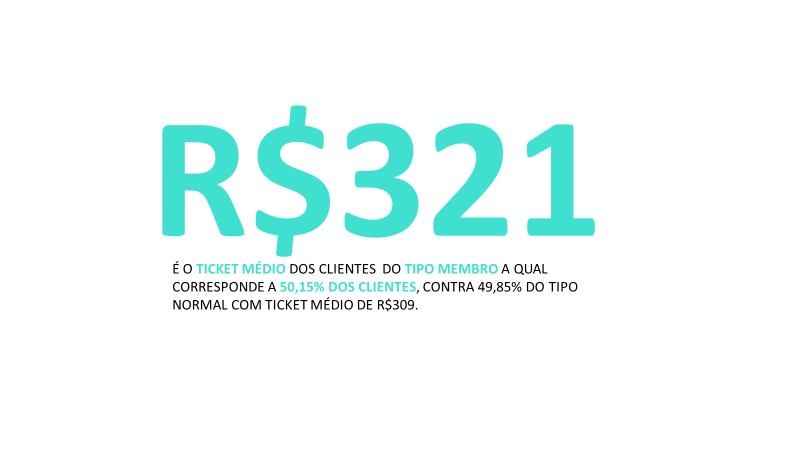


## Receita total por supermercado

In [277]:
df.groupby('supermercado').preco_total.sum().round(2).sort_values(ascending=False)[:3]

supermercado
A    104209.26
B    104152.80
C    103491.18
Name: preco_total, dtype: float64

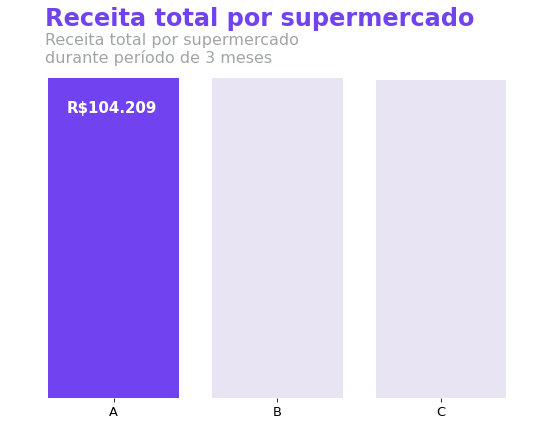

In [278]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=72)

df.groupby('supermercado').preco_total.sum().round(2).sort_values(ascending=False)[:3].plot(kind='bar', ax=ax, color = cor,width=0.8);

ax.text(0.07, 1.11,'Receita total por supermercado', transform=ax.transAxes,fontsize=24, fontweight='bold',color=p)
ax.text(0.07, 1.,'Receita total por supermercado \ndurante período de 3 meses', transform=ax.transAxes,fontsize=16, color='#A1A5A6')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis="x", labelsize=13)
ax.set_yticklabels([])
ax.set_yticks([])

ax.set_xlabel('') 
ax.text(0.11, 0.85,'R$104.209', transform=ax.transAxes,fontweight='bold',fontsize=15, color='w')

plt.xticks(rotation='horizontal') 
plt.tight_layout()
plt.show()

## Receita total por linha de produto 

###Receita total por linha de produto em todos os supermercados


In [279]:
df.groupby('linha_produto').preco_total.sum().round(2).sort_values(ascending=False)

linha_produto
Food and beverages        55110.38
Electronic accessories    54337.53
Sports and travel         54120.71
Fashion accessories       51203.25
Home and lifestyle        48837.87
Health and beauty         48243.49
Name: preco_total, dtype: float64

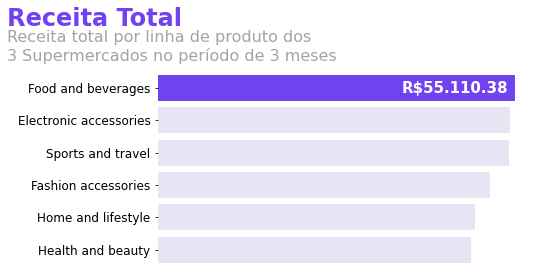

In [280]:

fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize=(8, 4))

df.groupby('linha_produto').preco_total.sum().round(2).sort_values(ascending=True).plot(kind='barh', ax=ax, color = cor1,width=0.8)

ax.text(-0.4, 1.2,'Receita Total', transform=ax.transAxes,fontsize=24, fontweight='bold',color=p)
ax.text(-0.4, 1.03,'Receita total por linha de produto dos \n3 Supermercados no período de 3 meses', transform=ax.transAxes,fontsize=16, color='#A1A5A6')

ax.text(0.65, 0.87,'R$55.110.38', transform=ax.transAxes,fontweight='bold',fontsize=15, color='w')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticklabels(labels=[], set_visible=False)
ax.set_xticks(ticks=[])
ax.set_ylabel('')
ax.tick_params(axis="y", labelsize=12)

plt.tight_layout()


In [281]:
df_A = df.loc[df.supermercado == 'A']
df_B = df.loc[df.supermercado == 'B']
df_C = df.loc[df.supermercado == 'C']

###Receita total por linha de produto no supermercado A

In [282]:
print(df_A.groupby('linha_produto').preco_total.sum().round(2).sort_values(ascending=False))

linha_produto
Home and lifestyle        21465.37
Sports and travel         19372.70
Electronic accessories    18317.11
Food and beverages        17163.10
Fashion accessories       15293.22
Health and beauty         12597.75
Name: preco_total, dtype: float64


###Receita total por linha de produto no supermercado B

In [283]:
print(df_B.groupby('linha_produto').preco_total.sum().round(2).sort_values(ascending=False))

linha_produto
Sports and travel         19988.20
Health and beauty         19980.66
Electronic accessories    17051.44
Fashion accessories       16413.32
Home and lifestyle        15504.29
Food and beverages        15214.89
Name: preco_total, dtype: float64


###Receita total por linha de produto no supermercado C

In [284]:
print(df_C.groupby('linha_produto').preco_total.sum().round(2).sort_values(ascending=False))

linha_produto
Food and beverages        22732.39
Fashion accessories       19496.72
Electronic accessories    18968.97
Health and beauty         15665.08
Sports and travel         14759.81
Home and lifestyle        11868.21
Name: preco_total, dtype: float64


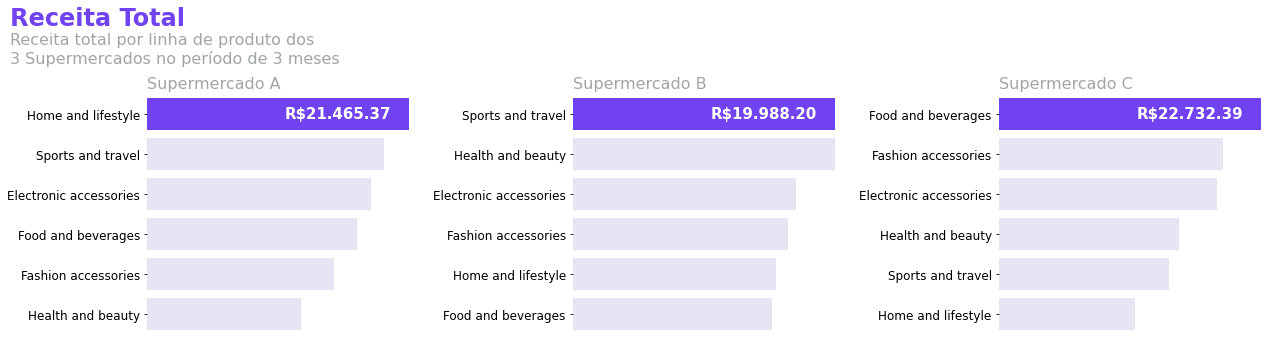

In [285]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, nrows = 1, figsize=(18, 5))

df_A.groupby('linha_produto').preco_total.sum().round(2).sort_values(ascending=False).plot(kind='barh', ax=ax1, color = cor,width=0.8);
df_B.groupby('linha_produto').preco_total.sum().round(2).sort_values(ascending=False).plot(kind='barh', ax=ax2, color = cor,width=0.8);
df_C.groupby('linha_produto').preco_total.sum().round(2).sort_values(ascending=False).plot(kind='barh', ax=ax3, color = cor,width=0.8);


ax1.text(-0.5, 1.25,'Receita Total', transform=ax1.transAxes,fontsize=24, fontweight='bold',color=p)
ax1.text(-0.5, 1.1,'Receita total por linha de produto dos\n3 Supermercados no período de 3 meses', transform=ax1.transAxes,fontsize=16, color='#A1A5A6')
ax1.text(0, 1,'Supermercado A', transform=ax1.transAxes,fontsize=16, color='#A1A5A6')
ax2.text(0, 1,'Supermercado B', transform=ax2.transAxes,fontsize=16, color='#A1A5A6')
ax3.text(0, 1,'Supermercado C', transform=ax3.transAxes,fontsize=16, color='#A1A5A6')

ax1.text(0.5, 0.88,'R$21.465.37', transform=ax1.transAxes,fontweight='bold',fontsize=15, color='w')
ax2.text(0.5, 0.88,'R$19.988.20', transform=ax2.transAxes,fontweight='bold',fontsize=15, color='w')
ax3.text(0.5, 0.88,'R$22.732.39', transform=ax3.transAxes,fontweight='bold',fontsize=15, color='w')

for ax in (ax1, ax2, ax3):
  ax.invert_yaxis()
  ax.spines['right'].set_visible(False)
  ax.spines['top'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.spines['bottom'].set_visible(False)
  ax.set_xticklabels(labels=[], set_visible=False)
  ax.set_xticks(ticks=[])
  ax.set_ylabel('')
  ax.tick_params(axis="y", labelsize=12)

plt.tight_layout()
plt.show()

##Linhas de produtos mais vendidas por quantidade

###Linhas de produtos mais vendidas em todos os supermercados

In [286]:
df.linha_produto.value_counts()

Fashion accessories       175
Food and beverages        173
Electronic accessories    170
Sports and travel         165
Home and lifestyle        155
Health and beauty         151
Name: linha_produto, dtype: int64

### Linhas de produtos mais vendidas do supermercado A

In [287]:
df.loc[df.supermercado == 'A'].linha_produto.value_counts()

Home and lifestyle        64
Electronic accessories    60
Sports and travel         59
Food and beverages        58
Fashion accessories       50
Health and beauty         47
Name: linha_produto, dtype: int64

### Linhas de produtos mais vendidas do supermercado B

In [288]:
df.loc[df.supermercado == 'B'].linha_produto.value_counts()

Fashion accessories       62
Sports and travel         62
Electronic accessories    55
Health and beauty         53
Food and beverages        50
Home and lifestyle        48
Name: linha_produto, dtype: int64

### Linhas de produtos mais vendidas do supermercado C

In [289]:
df.loc[df.supermercado == 'C'].linha_produto.value_counts()

Food and beverages        65
Fashion accessories       63
Electronic accessories    55
Health and beauty         51
Sports and travel         44
Home and lifestyle        43
Name: linha_produto, dtype: int64

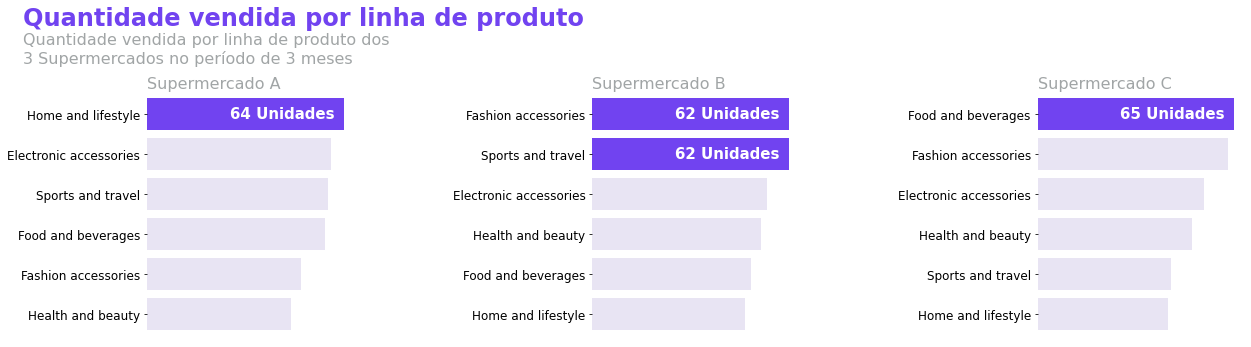

In [290]:
cor02 = [p,'#e8e4f3','#e8e4f3','#e8e4f3','#e8e4f3','#e8e4f3']
cor1 = [p, p,'#e8e4f3','#e8e4f3','#e8e4f3','#e8e4f3']
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, nrows = 1, figsize=(18, 5))

df.loc[df.supermercado == 'A'].linha_produto.value_counts().plot(kind='barh', ax=ax1, color = cor02,width=0.8);
df.loc[df.supermercado == 'B'].linha_produto.value_counts().plot(kind='barh', ax=ax2, color = cor1,width=0.8);
df.loc[df.supermercado == 'C'].linha_produto.value_counts().plot(kind='barh', ax=ax3, color = cor02,width=0.8);

ax1.text(-0.6, 1.25,'Quantidade vendida por linha de produto', transform=ax1.transAxes,fontsize=24, fontweight='bold',color=p)
ax1.text(-0.6, 1.1,'Quantidade vendida por linha de produto dos\n3 Supermercados no período de 3 meses', transform=ax1.transAxes,fontsize=16, color='#A1A5A6')
ax1.text(0, 1,'Supermercado A', transform=ax1.transAxes,fontsize=16, color='#A1A5A6')
ax2.text(0, 1,'Supermercado B', transform=ax2.transAxes,fontsize=16, color='#A1A5A6')
ax3.text(0, 1,'Supermercado C', transform=ax3.transAxes,fontsize=16, color='#A1A5A6')

ax1.text(0.4, 0.88,'64 Unidades', transform=ax1.transAxes,fontweight='bold',fontsize=15, color='w')
ax2.text(0.4, 0.88,'62 Unidades', transform=ax2.transAxes,fontweight='bold',fontsize=15, color='w')
ax2.text(0.4, 0.72,'62 Unidades', transform=ax2.transAxes,fontweight='bold',fontsize=15, color='w')
ax3.text(0.4, 0.88,'65 Unidades', transform=ax3.transAxes,fontweight='bold',fontsize=15, color='w')

for ax in (ax1, ax2, ax3):
  ax.invert_yaxis()
  ax.spines['right'].set_visible(False)
  ax.spines['top'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.spines['bottom'].set_visible(False)
  ax.set_xticklabels(labels=[], set_visible=False)
  ax.set_xticks(ticks=[])
  ax.set_ylabel('')
  ax.tick_params(axis="y", labelsize=12)

plt.tight_layout()
plt.show()


##Avaliação dos clientes por supermercado

Vale ressaltar que as notas atribuídas aos supermercados e as linhas de produtos têm valor máximo 10.

In [291]:
df.groupby('supermercado').avaliacao.mean().round(2).sort_values(ascending=False)[:]

supermercado
C    7.08
A    7.02
B    6.83
Name: avaliacao, dtype: float64

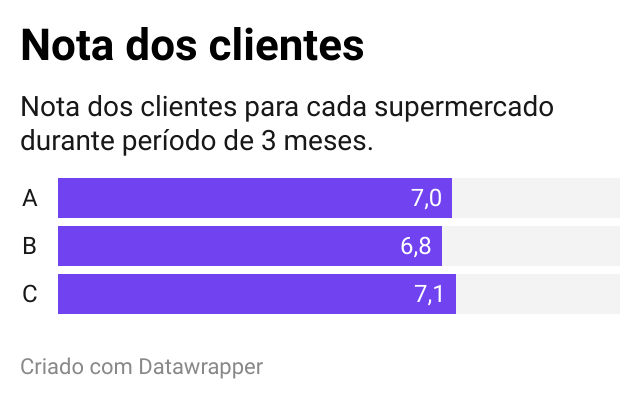

###Avaliação dos clientes por linha de produto no supermercado A

In [292]:
df_A.groupby('linha_produto').avaliacao.mean().round(2).sort_values(ascending=False)[:]

linha_produto
Sports and travel         7.26
Food and beverages        7.25
Home and lifestyle        6.92
Electronic accessories    6.91
Health and beauty         6.90
Fashion accessories       6.84
Name: avaliacao, dtype: float64

###Avaliação dos clientes por linha de produto no supermercado B

In [293]:
df_B.groupby('linha_produto').avaliacao.mean().round(2).sort_values(ascending=False)[:]


linha_produto
Electronic accessories    7.12
Health and beauty         7.10
Food and beverages        6.99
Fashion accessories       6.72
Home and lifestyle        6.59
Sports and travel         6.51
Name: avaliacao, dtype: float64

###Avaliação dos clientes por linha de produto no supermercado C

In [294]:
df_C.groupby('linha_produto').avaliacao.mean().round(2).sort_values(ascending=False)[:]

linha_produto
Fashion accessories       7.43
Food and beverages        7.12
Home and lifestyle        7.09
Sports and travel         7.07
Health and beauty         6.98
Electronic accessories    6.75
Name: avaliacao, dtype: float64

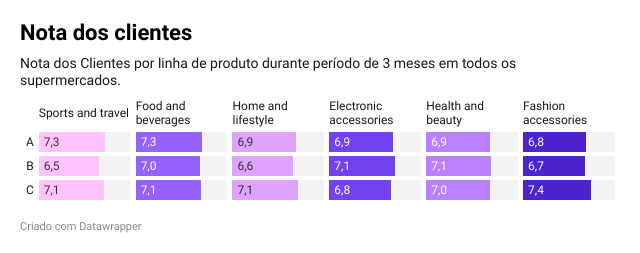

##Forma de pagamento mais usada

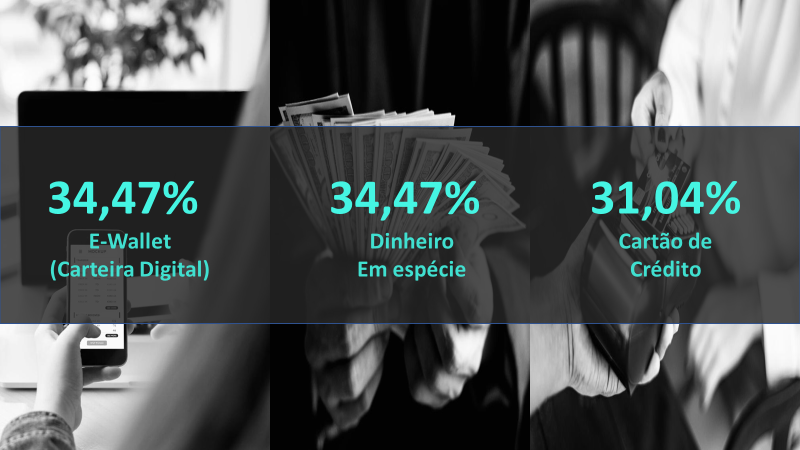

In [295]:
# qual tipo de pagamento menos e mais usado 
df.pagamento.value_counts() / df.shape[0] * 100

Ewallet        34.479272
Cash           34.479272
Credit card    31.041456
Name: pagamento, dtype: float64

## Gráfico de histograma de vendas totais

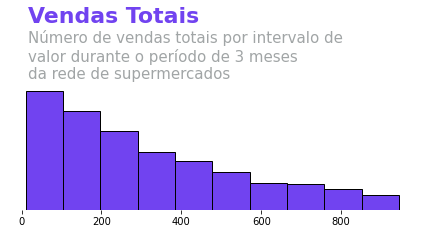

In [296]:
fig, ax = plt.subplots()

df['preco_total'].hist(ax=ax, grid=False, ec = 'k', color = p);

ax.text(0.05, 1.5,'Vendas Totais', transform=ax.transAxes,fontsize=22, fontweight='bold',color=p)
ax.text(0.05, 1.05,'Número de vendas totais por intervalo de\nvalor durante o período de 3 meses \nda rede de supermercados', transform=ax.transAxes,fontsize=15, color='#A1A5A6')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_yticklabels(labels=[], set_visible=False)
ax.set_yticks(ticks=[])


plt.tight_layout()
plt.show()


Nota-se pelo histograma que a quantidade de vendas vai diminuindo de acordo com o valor total da compra, algo já esperado em uma rede de supermercados.

##Dia da semana com maior número de vendas

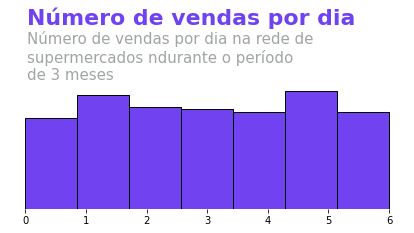

In [297]:
fig, ax = plt.subplots()
df['data'].apply(lambda x: x.weekday()).hist(bins=7, ax=ax, grid=False, ec = 'k', color = p);


ax.text(0.05, 1.5,'Número de vendas por dia', transform=ax.transAxes,fontsize=22, fontweight='bold',color=p)
ax.text(0.05, 1.05,'Número de vendas por dia na rede de \nsupermercados ndurante o período\nde 3 meses', transform=ax.transAxes,fontsize=15, color='#A1A5A6')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_yticklabels(labels=[], set_visible=False)
ax.set_yticks(ticks=[])


plt.tight_layout()
plt.show()

Vemos que as quantidades de vendas são semelhantes entre os dias da semana sendo o valor 0 segunda-feira e o valor 6 domingo. Entre os dias com mais vendas durante o período de 3 meses estão terça-feira e sábado.

## Hora do dia com maior número de vendas

In [298]:
#horas com mais compras
df['hora'] = df['hora'].dt.hour

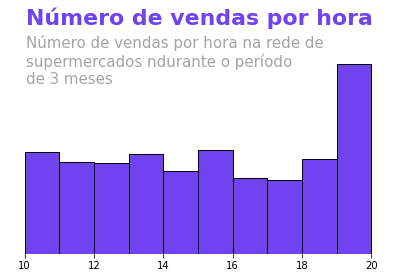

In [299]:
fig, ax = plt.subplots()
df['hora'].hist(ax=ax, grid=False, ec = 'k', color = p);

ax.text(0.05, 1.15,'Número de vendas por hora', transform=ax.transAxes,fontsize=22, fontweight='bold',color=p)
ax.text(0.05, 0.85,'Número de vendas por hora na rede de \nsupermercados ndurante o período\nde 3 meses', transform=ax.transAxes,fontsize=15, color='#A1A5A6')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_yticklabels(labels=[], set_visible=False)
ax.set_yticks(ticks=[])

plt.tight_layout()

Vemos que as quantidades de vendas são semelhantes entre as horas do dia, entretando o período de 19:00h até as 20:00h tem um período de vendas elevado em relação a média dos horarios.

# Conclusão

Podemos ver que é possível extrair diversas informações somente com algumas informações básicas, hoje em dia a quantidade de dados que as empresas possuem dos seus clientes e seus padrões, coloca as empresas que possuem habilidades de tomar uma decisão baseada em dados em outro patamar.
 
Com isso é possível observar diversas informações retiradas do dataset como 
quantidade de vendas gerais, tipos de itens mais vendidos, dias da semana com maior número de compras e suas respectivas horas, a forma de pagamento mais usada, avaliações dos clientes no supermercado e na linhas de produtos e diversas outras informações.
 
Portante fica mais que evidenciado que as empresas que possuem analistas têm vantagem competitivas significativas em relação a sua concorrência, pois esses padrões podem se tornar campanhas de vendas, campanhas de marketing, direcionar recursos e atenções para determinada área entre outras funcionalidades, logo deixo o meu obrigado por ler  até aqui e espero que você tenha saído com uma visão diferente de programação no uso real em empresas.
